# Programming Assignment - 8
---
## Name: Samruth Vennapusala
---

In [23]:
# Import required packages
import numpy as np

## Question 1
---
Implement the multiplicative NMF algorithm discussed in class. Write a function lee_seung(V, k, maxiteration) that takes a nonnegative matrix V and returns W and H.  For test, create a random nonnegative matrix of dimension 200x500 where the elements are uniformly distributed in [0,1]. Print the value $ \|V-WH\|_F /\|V\|_F$.

In [24]:
# Your code comes here
def lee_seung(v_in,k, maxiteration):

    u,s,v=np.linalg.svd(v_in,full_matrices=False)
    v=v.T
    w=np.zeros((v_in.shape[0],k))
    h=np.zeros((k,v_in.shape[1]))
    w[:,0]=np.sqrt(s[0])*np.abs(u[:,0])
    h[0,:]=np.sqrt(s[0])*np.abs(v[:,0].T)

    for i in range(1,k):
        ui=u[:,i]
        vi=v[:,i]
        ui_pos=(ui>=0)*ui
        ui_neg=(ui<0)*-ui
        vi_pos=(vi>=0)*vi
        vi_neg=(vi<0)*-vi
        ui_pos_norm=np.linalg.norm(ui_pos,2)
        ui_neg_norm=np.linalg.norm(ui_neg,2)
        vi_pos_norm=np.linalg.norm(vi_pos,2)
        vi_neg_norm=np.linalg.norm(vi_neg,2)
        norm_pos=ui_pos_norm*vi_pos_norm
        norm_neg=ui_neg_norm*vi_neg_norm
        
        if norm_pos>=norm_neg:
            w[:,i]=np.sqrt(s[i]*norm_pos)/ui_pos_norm*ui_pos
            h[i,:]=np.sqrt(s[i]*norm_pos)/vi_pos_norm*vi_pos.T
        else:
            w[:,i]=np.sqrt(s[i]*norm_neg)/ui_neg_norm*ui_neg
            h[i,:]=np.sqrt(s[i]*norm_neg)/vi_neg_norm*vi_neg.T

    return w,h

In [25]:
v = np.random.rand(200,500)
v_rank = np.linalg.matrix_rank(v)

w,h = lee_seung(v_in=v,k=2, maxiteration=200)


model = skd.NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(v)
H = model.components_


final_ls = np.linalg.norm(v - (w@h), 'fro') / np.linalg.norm(v)
final_sk = np.linalg.norm(v - (W@H), 'fro') / np.linalg.norm(v)

print(f'Lee_seung Forbenius norm is: {final_ls}')
print(f'Sklearn NMF forbenius norm is: {final_sk}')

Lee_seung Forbenius norm is: 0.49774400803271707
Sklearn NMF forbenius norm is: 0.49537201924241947


## Question 2
---
Find the nonnegative basis representation of images from one of the following databases. Show a comparison of some sample images with their reconstruction from the basis.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

In [29]:
from sklearn.decomposition import PCA
import os
from sklearn import decomposition    
import matplotlib.pyplot as plt   

def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

Dimensions: (585, 480, 640)


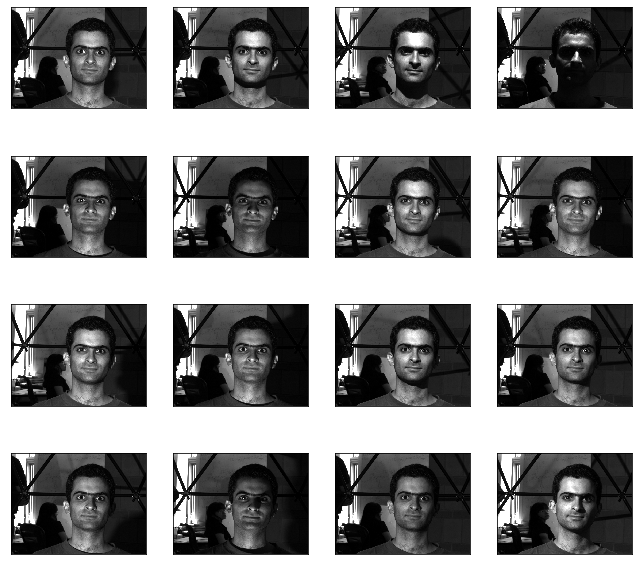

In [30]:
dir=r"C:\Users\samru\Desktop\yaleB11\yaleB11"
#dir='YALE/centered'
celebrity_photos=os.listdir(dir)[0000:1000]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
n_samples, h, w = images.shape
print("Dimensions:",images.shape)
plot_portraits(images, h, w, n_row=4, n_col=4)

# NMF

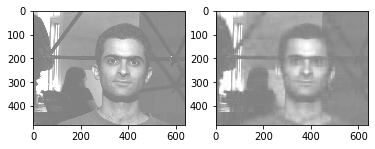

In [31]:
# Your code starts here.

img = images[1]  
vmax = max(img.max(), -img.min())

fig, (ax, ax2)  =plt.subplots(ncols=2)    
ax.imshow(img, cmap=plt.cm.gray, interpolation = 'nearest',vmin=-vmax,vmax=vmax)

n_components = 20

estimator = decomposition.NMF(n_components = n_components, init = 'random', tol=5e-3)    
W = estimator.fit_transform(img)
H = estimator.components_

new_img = np.dot(W,H)
ax2.imshow(new_img, cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)

plt.show()